In [212]:
import pandas as pd
import datetime
radiance_df = pd.read_csv('id_dgp_ev.csv',usecols=[0,2])
radiance_df[['view', 'year', 'month', 'day','time','T','M','D']]=pd.DataFrame(radiance_df['ID'].str.split('_').values.tolist())
radiance_df['time']=pd.to_numeric(radiance_df['time'])
radiance_df['hour']=radiance_df['time'].apply(int)
radiance_df['minute']=((radiance_df['time']-radiance_df['hour'])*60).round().apply(int)
radiance_df['hour']=radiance_df['hour'].apply(str)
radiance_df['minute']=radiance_df['minute'].apply(str)
radiance_df['Time']=pd.to_datetime(radiance_df['year']+'-'+radiance_df['month']+'-'+radiance_df['day']+' '+radiance_df['hour']+':'+radiance_df['minute'])
radiance_df =radiance_df[['Time','T','M','D','EV']]
radiance_df = radiance_df[~radiance_df['T'].str.contains('8909')]
radiance_df =radiance_df.sort_values(by=['Time'])
radiance_df = radiance_df.set_index('Time')
radiance_df=radiance_df['EV'].rename("Simulated_Ev")
#radiance_df.rename(index=str, columns={"EV": "a"})
radiance_df_20 =radiance_df.loc['2019-02-20 10:30:00':'2019-02-20 12:19:00']
radiance_df_25 =radiance_df.loc['2019-02-25 10:15:00':'2019-02-25 11:45:00']
radiance_df_22 =radiance_df.loc['2019-02-22 10:55:00':'2019-02-22 11:55:00']
upsampled_20 = radiance_df_20.resample('T').interpolate(method='polynomial', order=2)
# upsampled_25 = radiance_df_25.resample('T').interpolate(method='polynomial', order=2)
upsampled_22 = radiance_df_22.resample('T').interpolate(method='polynomial', order=2)
print(radiance_df_20)


Time
2019-02-20 10:30:00    28740.105948
2019-02-20 10:35:00    28753.959719
2019-02-20 10:40:00    29987.431315
2019-02-20 10:45:00    31853.897671
2019-02-20 10:50:00    31979.470400
2019-02-20 10:55:00    30277.621111
2019-02-20 11:00:00    27993.177078
2019-02-20 11:05:00    26781.701414
2019-02-20 11:10:00    28079.771975
2019-02-20 11:15:00    29295.854397
2019-02-20 11:20:00    24585.308028
2019-02-20 11:25:00    23111.750274
2019-02-20 11:30:00    27713.079191
2019-02-20 11:35:00    28584.889582
2019-02-20 11:40:00    23049.135356
2019-02-20 11:45:00    22041.376047
2019-02-20 11:50:00    20881.730286
2019-02-20 11:55:00    19204.797207
2019-02-20 12:00:00    19680.109959
2019-02-20 12:05:00    23910.977041
2019-02-20 12:10:00    26003.548454
2019-02-20 12:15:00    24610.445091
Name: Simulated_Ev, dtype: float64


In [213]:
import glob
import os
files=glob.glob('sensor*')
sensor_df =[]
for file in files:
    filename=os.path.basename(file)
    tint= filename.split('_')[2].split('.')[0]
    df = pd.read_csv(file,usecols=[1,2,3])
    df ['T']=df ['M']=df ['D']= str(tint)
    df ['time'] = pd.to_datetime(df ['Date'] +' '+df ['Time'])
    sensor_df.append(df)
    #print (tint)
sensor_dfs=pd.concat(sensor_df)
sensor_dfs = sensor_dfs [['time','T','M','D','Value']]
#sensor_dfs = sensor_dfs[~sensor_dfs['T'].str.contains('8908')]
sensor_dfs = sensor_dfs.set_index('time')
sensor_dfs=sensor_dfs['Value'].rename("Measured_Ev")
sensor_dfs_20 =sensor_dfs.loc['2019-02-20 10:30:00':'2019-02-20 12:16:00']
sensor_dfs_25 =sensor_dfs.loc['2019-02-25 10:15:00':'2019-02-25 11:45:00']
sensor_dfs_22 =sensor_dfs.loc['2019-02-22 10:55:00':'2019-02-22 11:56:00']
downsampled_20 = sensor_dfs_20.resample('T').mean()
downsampled_25 = sensor_dfs_25.resample('T').mean()
downsampled_22 = sensor_dfs_22.resample('T').mean()
print(sensor_dfs_20)

time
2019-02-20 10:30:04    28900
2019-02-20 10:30:14    28900
2019-02-20 10:30:24    28900
2019-02-20 10:30:34    28900
2019-02-20 10:30:44    28900
2019-02-20 10:30:54    29600
2019-02-20 10:31:04    29600
2019-02-20 10:31:14    29600
2019-02-20 10:31:24    30300
2019-02-20 10:31:34    30300
2019-02-20 10:31:44    30300
2019-02-20 10:31:54    30300
2019-02-20 10:32:04    30500
2019-02-20 10:32:14    30500
2019-02-20 10:32:24    30300
2019-02-20 10:32:34    30300
2019-02-20 10:32:44    30300
2019-02-20 10:32:54    30300
2019-02-20 10:33:04    30100
2019-02-20 10:33:14    29800
2019-02-20 10:33:24    29800
2019-02-20 10:33:34    29800
2019-02-20 10:33:44    29800
2019-02-20 10:33:54    29100
2019-02-20 10:34:04    29100
2019-02-20 10:34:14    29100
2019-02-20 10:34:24    28700
2019-02-20 10:34:34    28700
2019-02-20 10:34:44    28000
2019-02-20 10:34:54    28000
                       ...  
2019-02-20 12:11:04    22600
2019-02-20 12:11:14    21900
2019-02-20 12:11:24    22300
2019-02-2

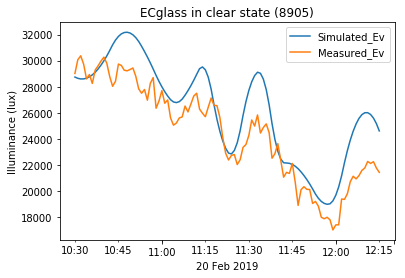

In [181]:
import matplotlib.pyplot as plt

upsampled_20.plot(legend=True)
downsampled_20.plot(legend=True)
plt.ylabel('Illuminance (lux)')
plt.xlabel('20 Feb 2019')
plt.title('ECglass in clear state (8905)')
plt.savefig('20_8905.jpg', dpi=300)
plt.show()


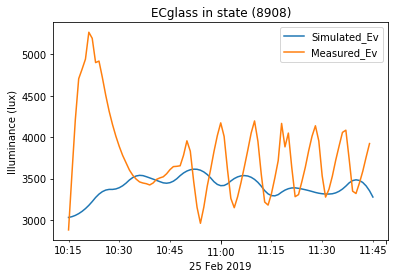

In [203]:
upsampled_25.plot(legend=True)
downsampled_25.plot(legend=True)
plt.ylabel('Illuminance (lux)')
plt.xlabel('25 Feb 2019')
plt.title('ECglass in state (8908)')
plt.savefig('25_8908.jpg', dpi=300)
plt.show()

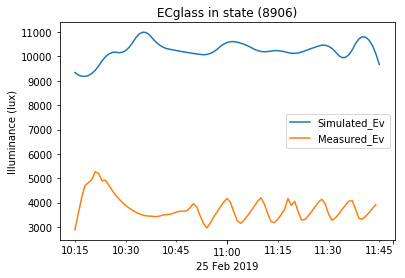

In [207]:
upsampled_25.plot(legend=True)
downsampled_25.plot(legend=True)
plt.ylabel('Illuminance (lux)')
plt.xlabel('25 Feb 2019')
plt.title('ECglass in state (8906)')
plt.savefig('25_8906.jpg', dpi=300)
plt.show()

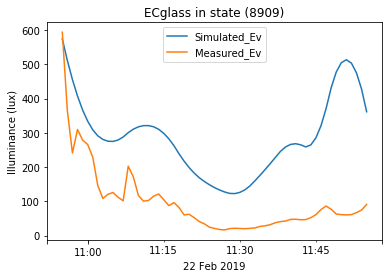

In [205]:
upsampled_22.plot(legend=True)
downsampled_22.plot(legend=True)
plt.ylabel('Illuminance (lux)')
plt.xlabel('22 Feb 2019')
plt.title('ECglass in state (8909)')
plt.savefig('22_8909.jpg', dpi=300)
plt.show()

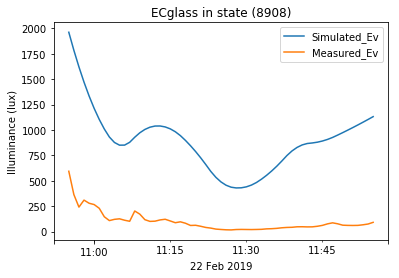

In [211]:
upsampled_22.plot(legend=True)
downsampled_22.plot(legend=True)
plt.ylabel('Illuminance (lux)')
plt.xlabel('22 Feb 2019')
plt.title('ECglass in state (8908)')
plt.savefig('22_8908.jpg', dpi=300)
plt.show()

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
rms_20=sqrt(mean_squared_error(upsampled_20.values, downsampled_20.values))
nrmse_20 = (rms_20/downsampled_20.mean())*100
nmbe_20 = (upsampled_20-downsampled_20).sum()*100/downsampled_20.sum()
r2_20 = r2_score(upsampled_20,downsampled_20)
print(rms_20,nrmse_20,nmbe_20,r2_20)

2275.0525229632626 9.284778644441005 7.0302363757648045 0.6259778023270073


In [159]:
rms_22=sqrt(mean_squared_error(upsampled_22.values, downsampled_22.values))
nrmse_22 = (rms_22/downsampled_22.mean())*100
nmbe_22 = (upsampled_22-downsampled_22).sum()*100/downsampled_22.sum()
r2_22 = r2_score(upsampled_22,downsampled_22)
print(rms_22,nrmse_22,nmbe_22,r2_22)

212.01244109863293 216.3573217401357 193.00573821415688 -2.499465275063512


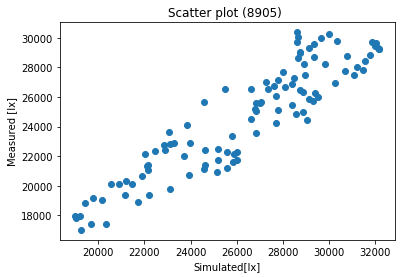

In [187]:
plt.scatter(upsampled_20,downsampled_20)
plt.ylabel('Measured [lx]')
plt.xlabel('Simulated[lx]')
plt.title('Scatter plot (8905) ')
plt.savefig('20_8905_scatter.jpg', dpi=300)
plt.show()